In [135]:
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fp_project = Path("/Users/asgerkromand/hoering")
fp_data = fp_project / "output" / "test_set"

In [87]:
# Load in json file with folder data
with open(fp_data / "folder_file_count.json", "r") as f:
    folder_data = json.load(f)


    case_id  file_count  percentile_group
0     10345           4                 0
1     67741           4                 0
2     14785           4                 0
3     13536           4                 0
4     68314           3                 0
..      ...         ...               ...
195   67083          17                 9
196   64672           9                 9
197   64174          12                 9
198   11017          13                 9
199   14653          10                 9

[200 rows x 3 columns]


/var/folders/sw/l43jl9d15098xcnblnvk66jc0000gn/T/ipykernel_48804/796674262.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df_sorted.groupby('percentile_group').apply(lambda x: x.sample(n=20, random_state=170497))


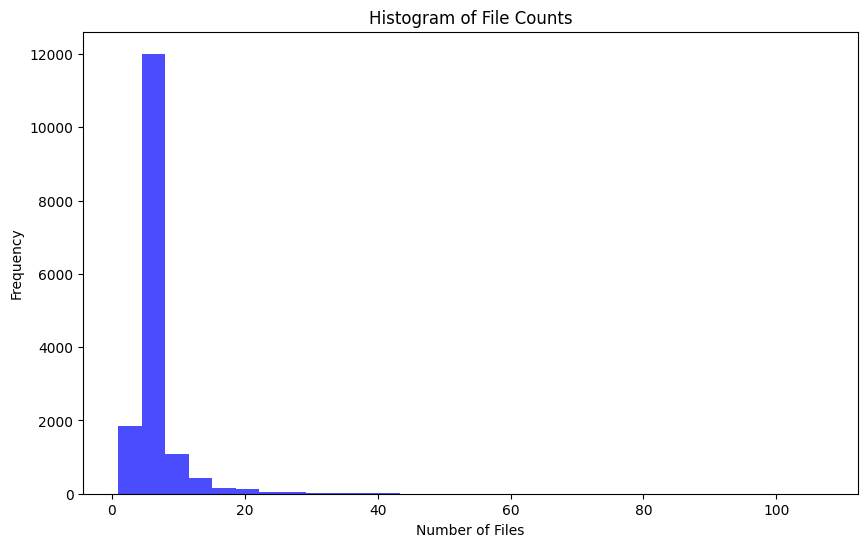

In [151]:
# Step 1: Convert folder_data into a DataFrame where each row is a list
df = pd.DataFrame(list(folder_data.items()), columns=["case_id", "files"])

# Make a file count column
df["file_count"] = df["files"].apply(lambda x: len(x))

# Make histogram of file counts
plt.figure(figsize=(10, 6))
plt.hist(df["file_count"], bins=30, color="blue", alpha=0.7)
plt.title("Histogram of File Counts")
plt.xlabel("Number of Files")
plt.ylabel("Frequency")


# Step 3: Sort by file_count to prepare for equally-sized binning
df_sorted = df.sort_values(by="file_count").reset_index(drop=True)

# Step 4: Split the sorted values into 10 equally sized parts (percentile groups)
num_groups = 10
df_sorted['percentile_group'] = pd.cut(df_sorted.index, bins=num_groups, labels=False)

# Step 5: Stratified Sampling (sample 2 cases per group)
stratified_sample = df_sorted.groupby('percentile_group').apply(lambda x: x.sample(n=20, random_state=170497))

# Step 6: Reset index for clarity
stratified_sample = stratified_sample.reset_index(drop=True)

# Step 7: Show the stratified sample result
print(stratified_sample[['case_id', 'file_count', 'percentile_group']])

# Output the stratified sample to a CSV file
fp_output = fp_project / "output"
fp_output.mkdir(exist_ok=True)
stratified_sample.to_csv(fp_output / "stratified_sample.csv", index=False)
